# Aula 14A - Tabelas Pivot e Crosstabs

In [29]:
import pandas as pd
path = '/content/drive/My Drive/Colab Notebooks/Data Science do ZERO/5 - Python para Análise de Dados/Materiais Disponibilizados/Pandas - Materiais de Apoio/kc_house_data.csv'
df = pd.read_csv (path,sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## df.pivot_table ( 'col1', index = [ " col2 " , " col3 " , ... ] , aggfunc = 'count' / 'mean' , margins = bool)

                                                                  TABELAS PIVOT
- Essas tabelas são úteis para fazer AGRUPAMENTO DOS DADOS
- No exemplo faremos a contagem ("aggfunc") de imóveis ("id") agrupados pelas colunas waterfront e floors ("index")
- Muito performático quando temos uma base de dados muito grande
- O objeto de saída é um DATAFRAME
    - Primeiro parâmetro --> normalmente é o id do df. Variável principal
    - index --> variáveis que realizarão o agrupamento
    - aggfunc --> função que será aplicada sobre os dados agrupados (contagem, média, DP, CV, etc.)
    - margins:
      - True --> retorna a quantidade total no final da tabela
      - False --> não retorna a quantidade total no final da tabela

In [30]:
# A saída é um df
df.pivot_table('id',
               index = ["waterfront","floors"],
               aggfunc = 'count',
               margins = True)

id
waterfront floors       
0          1.0     10622
           1.5      1889
           2.0      8166
           2.5       159
           3.0       605
           3.5         8
1          1.0        57
           1.5        21
           2.0        75
           2.5         2
           3.0         8
All                21612

## pd.crosstab (df [ 'col_name1' ] , df [ 'col_name2' ] )

                                                                           CROSSTAB
                                                              
- Crosstab ou Tabulação Cruzada
- Essa funcionalidade cruza valores das variáveis
- Faz uma tabela cruzando valores de duas variáveis (tabela de duas variáveis)
- O objeto de saída é um DATAFRAME
- Pode ser bastante útil para trabalhar com Probabilidades
- Nesse exemplo podemos ver qual a distribuição dos imóvies por número de quartos com relação a sua condição (1 = péssima condição e 5 = ótima condição)
- Podemos ver que imoveis com 3 quartos estão mais na condição 5

In [31]:
pd.crosstab(df['bedrooms'],df['condition'])

condition,1,2,3,4,5
bedrooms,,,,,
0.0,1,1,10,1,0
1.0,4,11,124,48,12
2.0,12,51,1779,717,200
3.0,8,69,6306,2711,728
4.0,4,36,4579,1682,580
5.0,0,1,1031,418,151
6.0,1,3,158,87,23
7.0,0,0,25,9,4
8.0,0,0,8,3,2


### Plotagem de Gráfico de Barras com a Crosstab

- Parâmetro "width" --> espessura das barras

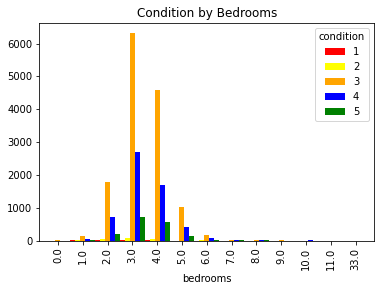

In [32]:
# Declarando variável para a crosstab
table = pd.crosstab(df['bedrooms'] , df['condition'])
# Plotando gráfico de barras com a crosstab criada "table"
table.plot(kind = 'bar',
           width = 1.0,
           color = ['red','yellow','orange','blue','green'],
           title = 'Condition by Bedrooms',
           grid = False)

# Aula 14B - Trabalhando com Excel

- Com o Pandas podemos trabalhar com o Excel



- Diante disso, pode-se usar o pandas para manipular planilhas do excel e até mesmo gerar novas planilhas a partir de outros dados

## pd.read_excel(path , sheet_name = n , header = n , index_col = n)

- Método para ler arquivos excel (.xls ou .xlsx)
- Parâmetros:
    - sheet_name --> número "n" que corresponde a sheet do excel (= 0 é a primeira sheet)
    - header --> número "n" da linha que corresponde ao cabeçalho do arquivo
    - index_col --> número "n" da coluna que indexará o df. A coluna selecionada será o índice do df
- O parâmetro "index_col" facilita a ordenação de uma planilha do excel. Podemos definir o parâmetro que queremos usar como referência para a ordenação da tabela como índice. Depois, podemos usar o método "sort_index" para ordenar os dados de acordo com a coluna índice

In [33]:
# Lendo uma planilha do excel no Pandas
path1 = '/content/drive/My Drive/Colab Notebooks/Data Science do ZERO/5 - Python para Análise de Dados/Materiais Disponibilizados/Pandas - Materiais de Apoio/Controle-de-Atividades-2.0.xlsx'
df_xls = pd.read_excel(path1, sheet_name=0,header=1)
df_xls.head()

,N°,Atividade,Responsável,Estado Atual,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Elaborar relatório de vendas,Antonio,ENCERRADA,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Encerrar Balanço,Antonio,INICIADA,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Preparar novo Plano de Contas,Pedro,ADIADA,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
4,4.0,Preparar reunião de resultados,Márcia,ENCERRADA,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA


In [35]:
# Lendo o arquivo indexando pela coluna 'Estado Atual'
df_xls = pd.read_excel(path1, sheet_name=0,header=1,index_col=3)
df_xls.head()

,N°,Atividade,Responsável,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
Estado Atual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENCERRADA,1.0,Elaborar relatório de vendas,Antonio,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INICIADA,2.0,Encerrar Balanço,Antonio,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADIADA,3.0,Preparar novo Plano de Contas,Pedro,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
ENCERRADA,4.0,Preparar reunião de resultados,Márcia,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA


In [36]:
# Ordenando o dataframe pela coluna de índice
# Como a coluna de índice é categórica, a ordenação é alfabética
df_xls.sort_index().head(4)

,N°,Atividade,Responsável,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
Estado Atual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ADIADA,3.0,Preparar novo Plano de Contas,Pedro,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
ENCERRADA,1.0,Elaborar relatório de vendas,Antonio,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENCERRADA,4.0,Preparar reunião de resultados,Márcia,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA
INICIADA,2.0,Encerrar Balanço,Antonio,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Gerando Planilhas a partir de Dataframes

- Vamos usar o dataset de imóveis do kaggle reduzido para criar uma tabela excel

In [38]:
df_small = pd.read_csv(path,sep=',',nrows=100)
df_small

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,20140908T000000,905000.0,4.0,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
96,3422049190,20150330T000000,247500.0,3.0,1.75,1960,15681,1.0,0,0,3,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
97,1099611230,20140912T000000,199000.0,4.0,1.50,1160,6400,1.0,0,0,4,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3.0,1.75,1810,41800,1.0,0,0,5,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


In [40]:
# Gerando uma planilha com algumas colunas
# Note que ao invés de selecionar as colunas com colchetes duplos, dividimos em
# duas linhas de código
colunas = ['id','price','bedrooms','bathrooms','sqft_living','floors','waterfront']
df_small = df_small [colunas]
df_small.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,7129300520,221900.0,3.0,1.00,1180,1.0,0
1,6414100192,538000.0,3.0,2.25,2570,2.0,0
2,5631500400,180000.0,2.0,1.00,770,1.0,0
3,2487200875,604000.0,4.0,3.00,1960,1.0,0
4,1954400510,510000.0,3.0,2.00,1680,1.0,0


### df.to_excel ('output_name.xls',index = bool)

- Exporta um df (armazena no disco) como uma planilha excel
- Parâmetro "index":
    - True --> exporta a planilha COM o índice (0,1,2,3...)
    - False --> exporta a planilha SEM o índice (0,1,2,3...)

In [0]:
# Escrevendo no disco a planilha sem o valor do índice
#df.to_excel ('tabela.xls',index = False)